<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/laboration_3-grupp-5/blob/master/Hand_in_Laboration3_part1_vt21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 3 part 1 Regression

In this part of laboratory 3 you will perform some different types of regression analysis on a dataset with weather data. Feel free to watch the lecture videos for lecture 6 that goes through regression (part 2 and 4 are most important). 

In the laboratory, only questions that have a **Q** in front should be answered (You may have to do some coding to be able to answer the question in some cases while in others there is only theoretical questions.). 


Tasks that are not questions but only coding are marked with **C**, these are also mandatory.

Example:

**Q** How many men and women have answered the survey? (Here it is preferable to do some coding to easily find the answer.)

**C** Encode a function that calculates the 20 most common words in your data set.

*When we correct the laboration we will not look specifically on how you did your coding to answer questions, but look at whether the answer is correct or not when it comes to questions marked with **Q** .*

**This part of the laboration will be corrected by Soraya (and Elin) and therefore you need to write your answers in English!**

**You are expected to add code blocks or text (markdown) blocks when needed. Make sure to use enough cells to make you code easy to read i.e. try to only make one thing in each cell.**

An initial import of a few of the required libraries is already coded, below. When you need other libraries you can add them in this cell or in the cell where you need them further in the lab. 

In [227]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

## Data

Start by: 
**C** Importing our dataset and store it in a suitable format with the name `weather_data`. 

In [228]:
#Mounting gDrive in Colaboratory
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"

Mounted at /content/drive/


In [229]:
# Import our WeatherData and store it in the variable weather_data 
weather_data = pd.read_csv("/content/drive/MyDrive/WeatherData_lab3.csv", delimiter=";")
# Display the data in the notebook
weather_data.head()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,Sunshine,Cloud,RainToday,Visibility (km)
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,No,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,No,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,No,14.9569
3,8.288889,14.1036,1016.41,0.83,NaN,NaN,No,15.8263
4,8.755556,11.0446,1016.51,0.83,NaN,7.0,No,15.8263


## Exploratory analysis
 

**Q** What type of data is in the dataset? (HINT! dtype and type of variable: categorial/continous) 

**Answer:** 7 floats and 1 str (object). 
*   Temperature (C)  - A continuous variable (quantitative)
*   Wind Speed (km/h) - A continuous variable (quantitative)
*   Pressure (millibars) - A continuous variable (quantitative)   
*   Humidity             - A continuous variable (quantitative)
*   Sunshine             - A categorical variable (qualitative)
*   Cloud                - A continuous variable (quantitative)
*   RainToday            - A categorical variable (qualitative)
*   Visibility (km)      - A continuous variable (quantitative)

**Q** How many rows and columns, number of datapoints?

**Answer:** 50 rows and 8 columns.

**Q** How do you interpret the different columns, write a short sentence that describes each column.

**Answer:**
       
*   Temperature (C)  - Temperature in celcius
*   Wind Speed (km/h) - Wind speed in km/h
*   Pressure (millibars) - Pressure in millibars    
*   Humidity             - Humidity measurement
*   Sunshine             - Sunshine measurement 
*   Cloud                - Cloud measurement
*   RainToday            - Rain today, Yes or No
*   Visibility (km)      - Visibility Measurement

**C** Rename columns that have unsuitable names for the columns or if the columns have names that are difficult to interpret. (IF everything looks good, you don't need to do anything here)

**C** Code suitable visualisations that show the relationship between the different variables in the dataset (in two dimensions). Include labels on x and y axis and display a legend for the visualisation(s). You can choose if you want to visualise each relationship in its own plot or if you want to plot all relationships in one visualisation, if you choose the latter, you need to make it possible to distinguish between the different variables.

**Q** What kinds of relationship can you see between the different variables? 
Positive and slightly linear correlation between temperature (y) and Wind_speed (x).
Negative, linear correlation between Temperature (y) and Humidity (x).
Negative and slighly linear correlation between Wind_speed and (y) and Humidity (x). 
The others have no clear linear connection.


In [230]:
#Which datatypes are in our dataframe?
print(f'{weather_data.dtypes}\n')
# int64, float64 and object with the majority being object. 

# How many rows and columns?
# 8 columns and 50 rows.
# Could also use .shape
print(f'Column amount:\t {len(weather_data.columns)} \nRow amount: \t {len(weather_data)}')

Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
Sunshine                float64
Cloud                   float64
RainToday                object
Visibility (km)         float64
dtype: object

Column amount:	 8 
Row amount: 	 50


In [231]:
#C Renaming, by removing the measurements, as C, Km and Visibilty and use underscore instead of space to make sure it works with dataframe.column syntax.

weather_data.rename(columns={'Temperature (C)': 'Temperature', 'Wind Speed (km/h)': 'Wind_speed', 'Pressure (millibars)':'Pressure', 'Visibility (km)' : 'Visibility'}, inplace=True)

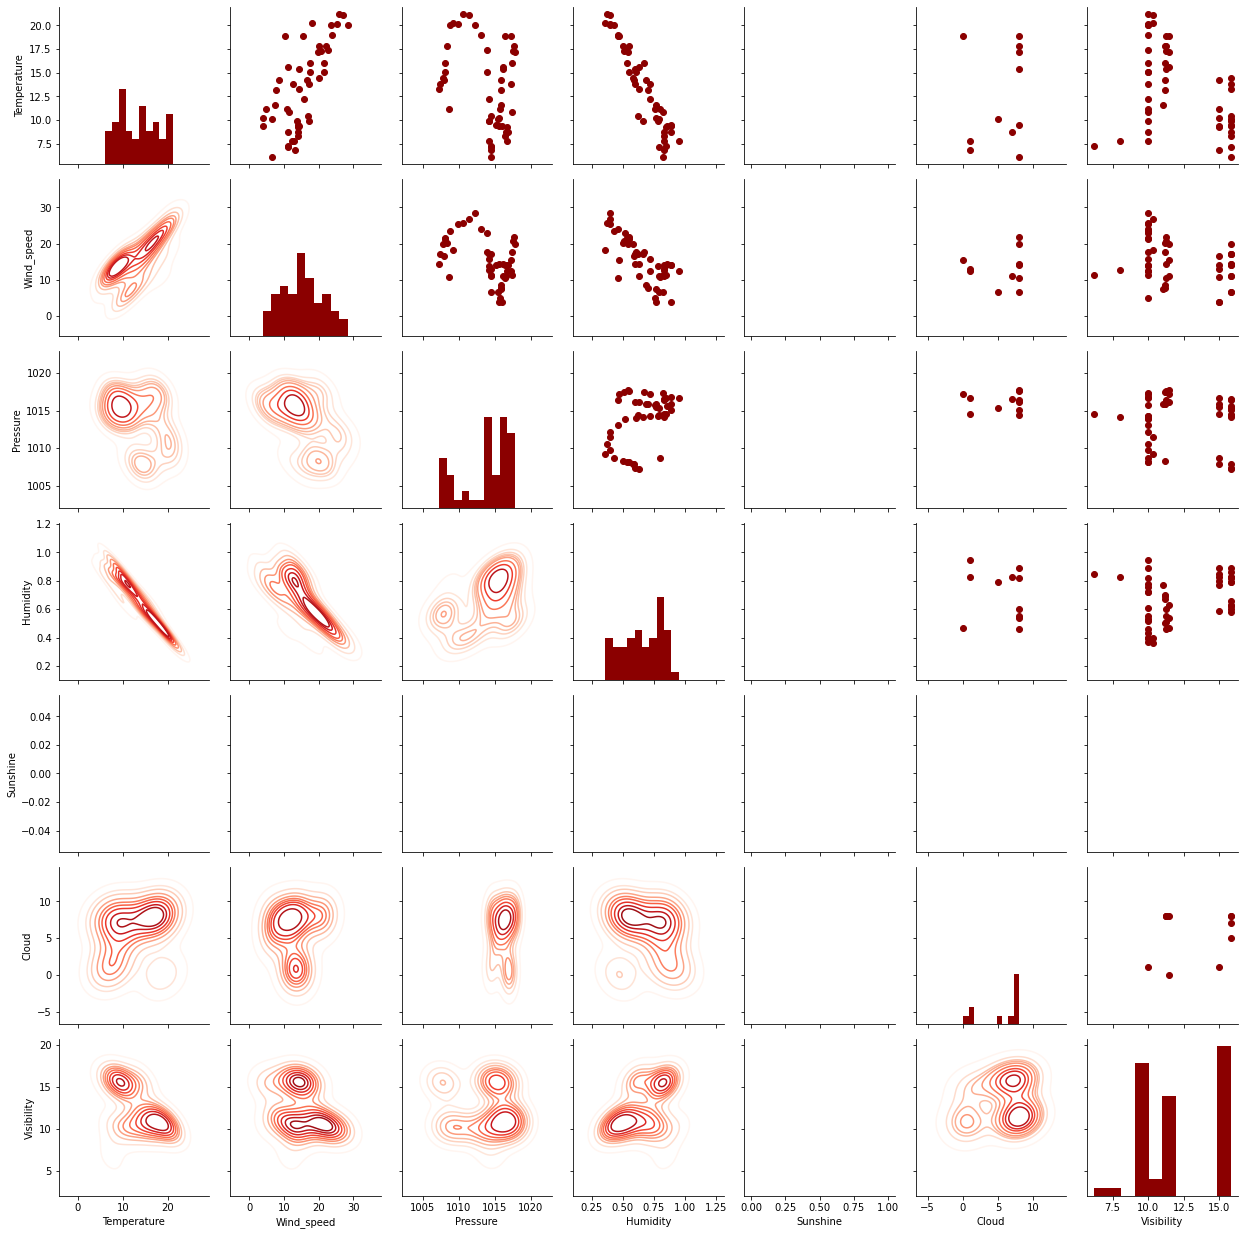

In [232]:
# Visualisation
# Init PairGrid class
grid = sns.PairGrid(weather_data, dropna=True)
# Map scatter plot
grid = grid.map_upper(plt.scatter, color = 'darkred')
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred')
# Map a density plot 
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

## Data cleaning and feature engineering

**Q** Are there any missing values? If yes, what is your interpretation of the reason(s) and what type of missing values? (HINT! MCAR;MAR;NMAR)

**Answer:** Sunshine misses all values which probably means that the data probably never was collected for some reason and therefore(NMAR). Cloud data is also missing a lot of values, which perhaps means it wasn't cloudy very often or just errors measuring. We suggest NMAR for cloud as well. RainToday has one missing value which indicates it probably is MCAR. 

**C** Handle any missing values in a suitable way (if there are none, you don't need to do anything here). Make sure you changes are saved in you dataframe.

**Q** Are there any variables that need further cleaning/feature engineering such as changing dtype/calculations to improve categorial features etc? 

**Answer:** The RainToday variable is difficult to work with in it's current form. We should transform it into a numerical value, like a boolean representing 0 and 1. We will remove the null value from RainToday since it's only 1 value missing and it won't affect the overall data in a significant way. Furthermore, Sunshine and Cloud won't be useful because Sunshine has only null values, and most of the Cloud values are null, so we remove these.

**Q** IS there a need fo standardization/normalization or scaling of variables? Why/why not? (Motivate for each of them)

**Answer:** We create a dummy variable for RainToday, so that it turns into a boolean value where 0 means no rain and 1 means rain. This makes it easier to use this value for analysis, since most techniques require numerical values. 

**C** If yes on any of the above, fix this column and make sure to make the changes on your existing dataframe.



In [233]:
# Checks if dataframe has any null values, which it indeed has.
print(f'Contains null values: {weather_data.isnull().values.any()}\n')

# Display null values per column
print(weather_data.isnull().sum()) 

Contains null values: True

Temperature     0
Wind_speed      0
Pressure        0
Humidity        0
Sunshine       50
Cloud          39
RainToday       1
Visibility      0
dtype: int64


In [234]:
# Removing Sunshine and Cloud columns. To few values to make any sense with. 
weather_data.drop('Sunshine', axis=1, inplace=True)
weather_data.drop('Cloud', axis=1, inplace=True)

# Removing row with NaN value in RainToday. Could perhaps be more suitable to change to 'Unknown' or take the most common answer, which is yes.
weather_data.dropna(subset = ['RainToday'], inplace = True)

# Demo showing that no null values exists anymore.
print(weather_data.isnull().sum()) 

Temperature    0
Wind_speed     0
Pressure       0
Humidity       0
RainToday      0
Visibility     0
dtype: int64


In [235]:
# Changing Yes/No to 1/0 with panda dummies, since machine learning needs numerical values.  
weather_data = pd.get_dummies(weather_data, columns=['RainToday'], drop_first=True)
weather_data

,Temperature,Wind_speed,Pressure,Humidity,Visibility,RainToday_Yes
0,9.472222,14.1197,1015.13,0.89,15.8263,0
1,9.355556,14.2646,1015.63,0.86,15.8263,0
2,9.377778,3.9284,1015.94,0.89,14.9569,0
3,8.288889,14.1036,1016.41,0.83,15.8263,0
4,8.755556,11.0446,1016.51,0.83,15.8263,0
5,9.222222,13.9587,1016.66,0.85,14.9569,0
6,7.733333,12.3648,1016.72,0.95,9.9820,0
7,8.772222,14.1519,1016.84,0.89,9.9820,0
8,10.822222,11.3183,1017.37,0.82,9.9820,0
9,13.772222,12.5258,1017.22,0.72,9.9820,1


## Linear Regression

### Your first task in regards to modeling is to do a simple linear regression, using only two of the variables present in the dataset.

To help you further the codeblock below show a heatmap of the correlation between the different varaibles. Also, another codeblock show a pairplot that visualize the relationsship between pairwise variables, it is coded using the seaborn library.



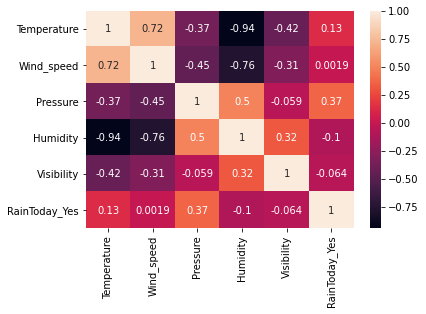

In [236]:
#seaborn heatmap
corrMatrix = weather_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

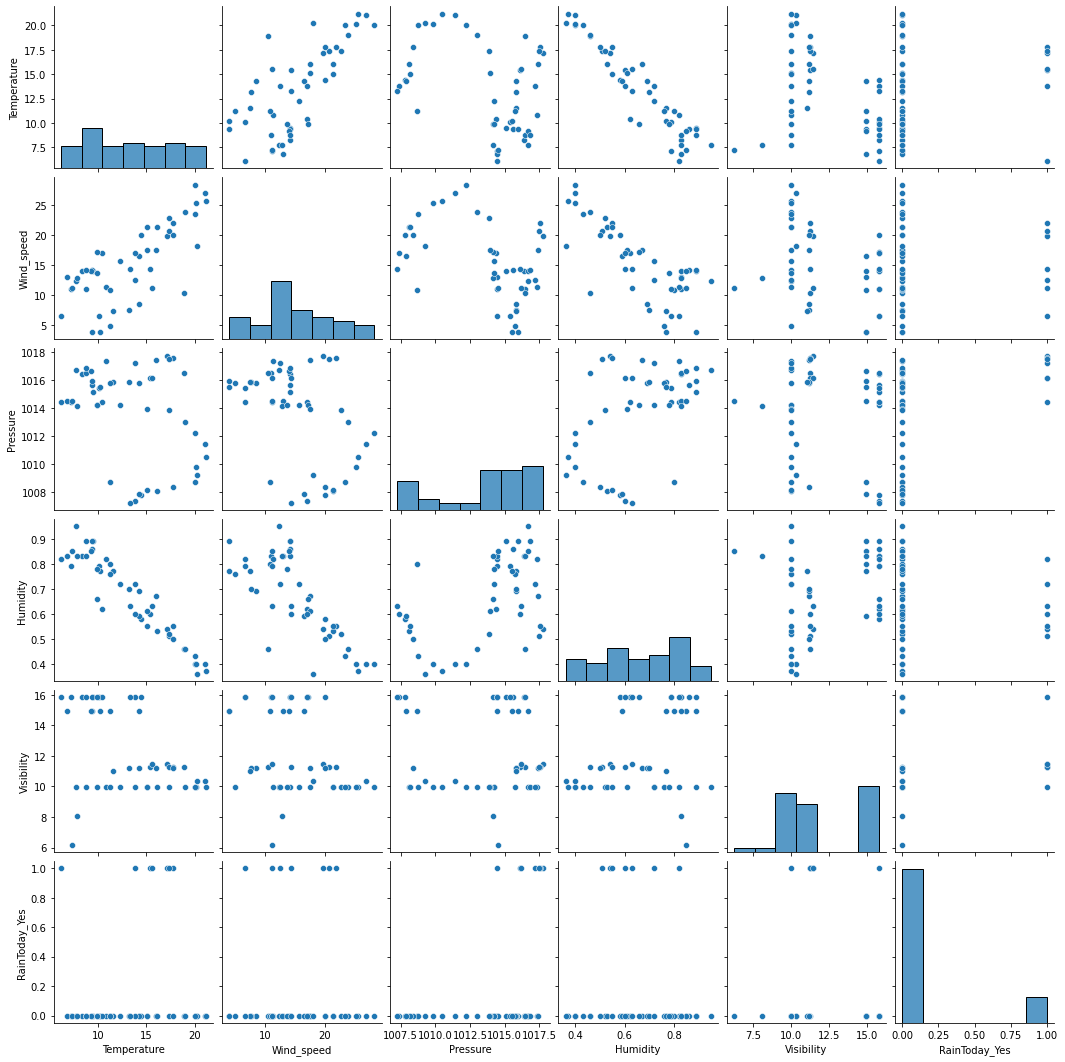

In [237]:
#seaborn pairplot
sns.pairplot(weather_data)

**Q** Based on the heat map and your visualisations on relationships, which two variables (one for input (x) and another for output (y) would you consider most appropriate for doing a linear regression analysis? 

**Answer:**  Temperature and Humidity. The have a strong negative relationship. We would argue that the temperature and humidity has a strong correlation and since temperature is more relevant for us humans and gives a more general depiction of the weather, we therefore try to predict the temperature (y) via the humidity (x).

HINT! THe table below (from [this page](https://www.statology.org/what-is-a-strong-correlation/))helps you interpret the heatmap. **A must in a linear regression model is to have a linear relationship between the variables!**

r in the table below is the Pearson correlation coefficient that pandas calculate for us (Note that it it the absolut value of r, the correclation coefficent can be both negative and positive). Also see [pandas documentation on correlation calculations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

| Absolute value of r    | Strength of relationship|        
|------------------------|-------------------------|
| r < 0.25               |No relationship          |
| 0.25 < r < 0.5         |Weak relationship        |
| 0.5 < r < 0.75         |Moderate relationship    |
| r > 0.75               |Strong relationship      |


**Q** Which column should represent the independent variable, x, and the dependent variable, y (the one you want to predict). In order to get the best possible prediction of y? 
Motivate your answer

**Answer:** We have decided Temperature should represent the indepentent variable and humidity the dependent in our case. As stated in the Q above we consider it to be more relevant to predict temperature via humidity.

**C** Investigate if there are any outliers in the two variables you have chosen, if so, handle them in a suitable way. 

**Q** Why did you choose to handle/not handle the outliers in the two variables?

**Answer:** No outliers detected, so no outliers handled. If there would be some outliers in our data, we would most likely remove them so that they won't interfer with the overall results as much, or if there's several outliers we would get the average value of the data and translate the outliers into the average, so that we don't lose too much data. However, replacing the outliers with average values will result in an overestimated data set, but luckily there is no outliers this time.

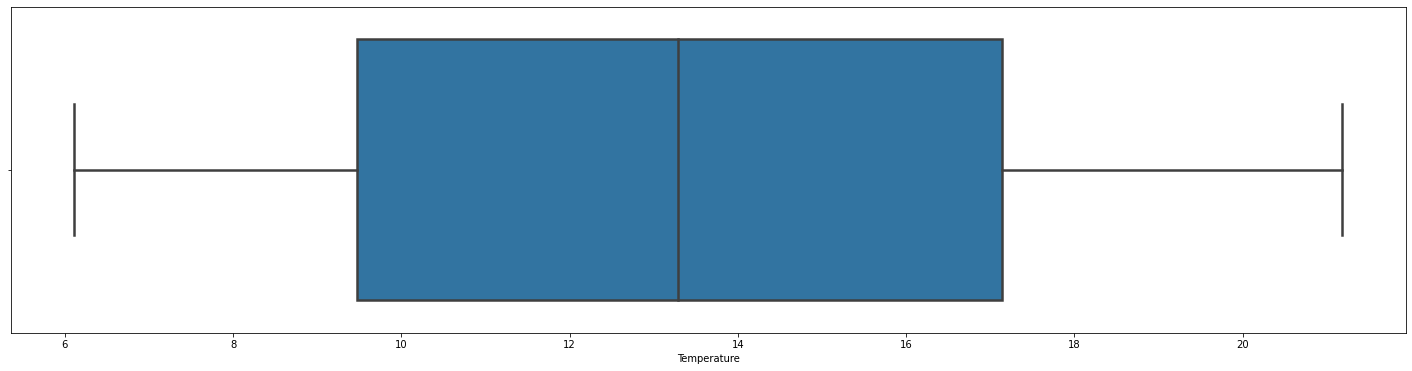

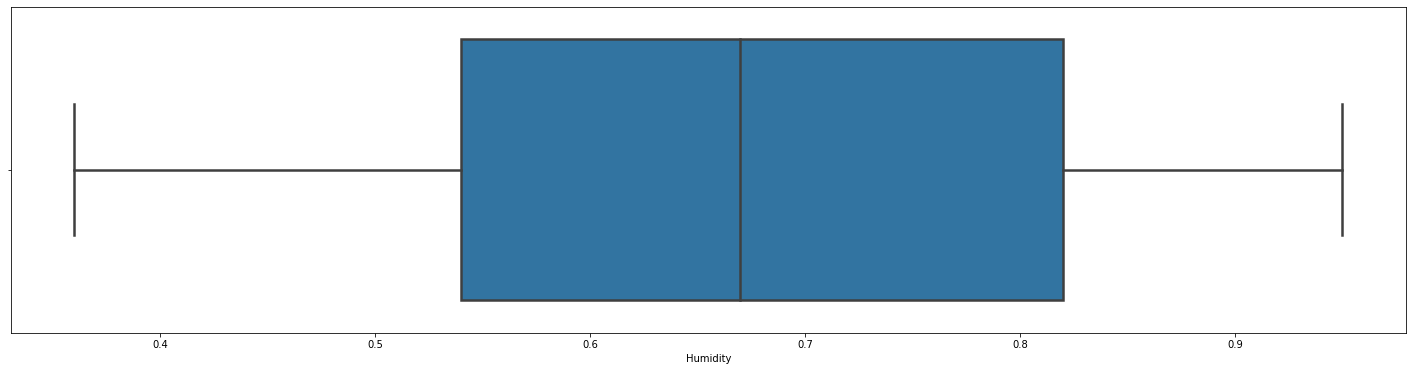

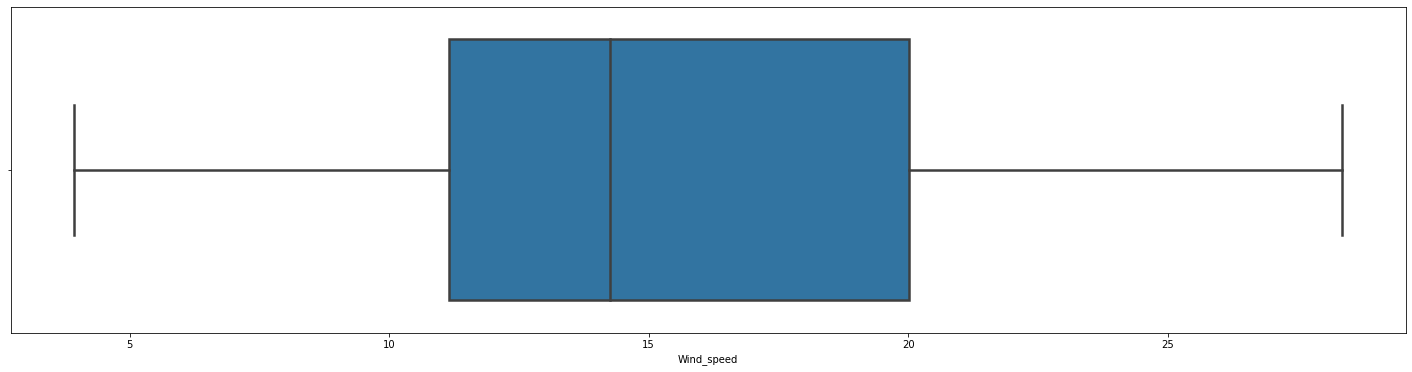

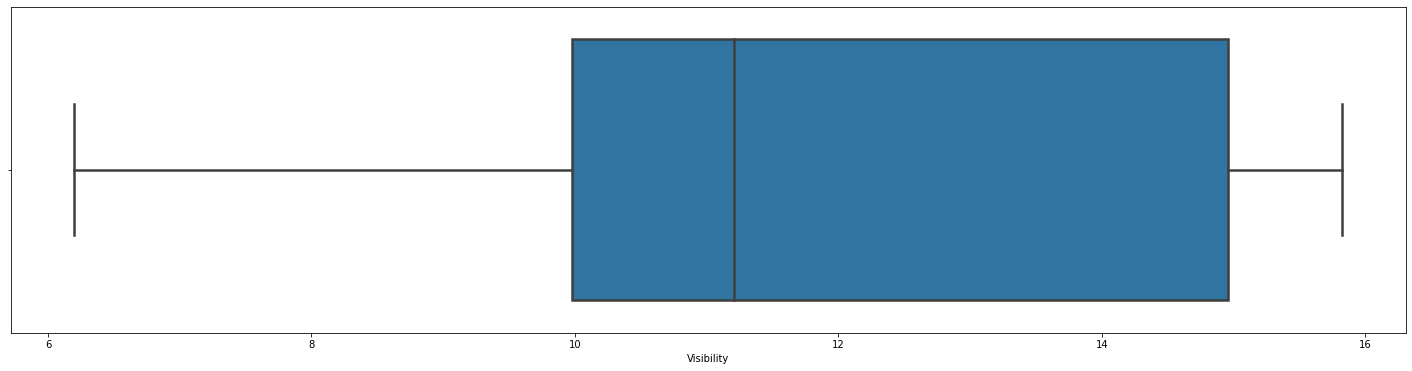

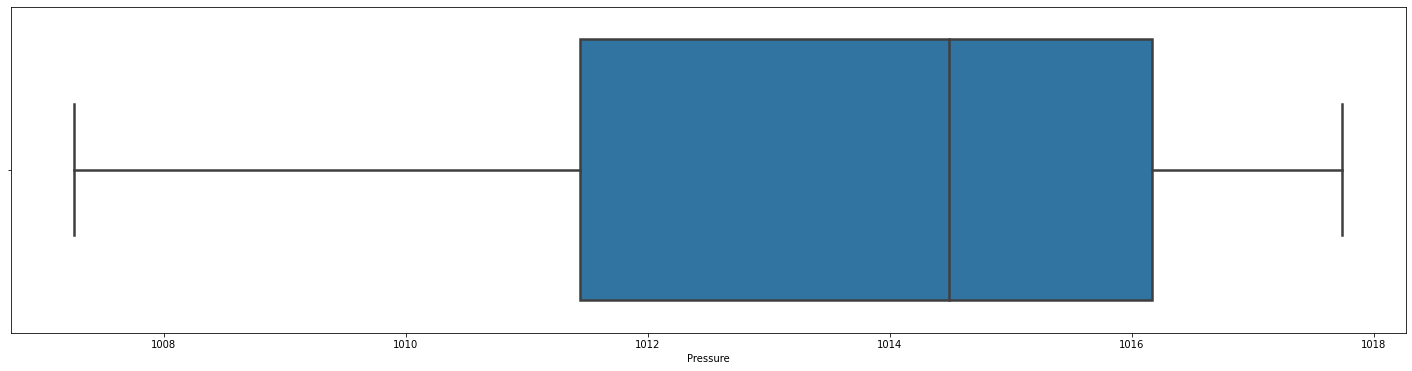

In [238]:
# Function for plotting outliers
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)

# Plot all numerical values 
plot_outlier(weather_data['Temperature'])
plot_outlier(weather_data['Humidity'])
plot_outlier(weather_data['Wind_speed'])
plot_outlier(weather_data['Visibility'])
plot_outlier(weather_data['Pressure'])


In [239]:
# Also checking with zscore just to make sure. Not necessary.
# Creating list with zscore
z=np.abs(stats.zscore(weather_data.Temperature))
limit = 3

# Returns empty array which means no value is above limit. 
print(np.where(z>limit))

(array([], dtype=int64),)


In [240]:
# Also checking with zscore just to make sure. Not necessary.
# Creating list with zscore
z=np.abs(stats.zscore(weather_data.Temperature))
limit = 3

# Returns empty array which means no value is above limit. 
print(np.where(z>limit))

(array([], dtype=int64),)


### Modeling

**C** Assign the correct values to x and y in the codeblock provided below. (NOTE! You should call values().reshape() on x because scikit_learn requires input to be in the form of two dimensional arrays i.e. a numpy array (created by pandas.values() in 2D ()created by numpy.reshape()). Or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies. See also [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) and [scikit_learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

The code already visible below imports the correct scikit_learn model (LinearRegression) in order to perform the training. Further, code is provided that performs the splitting of data into training and test and also performs the training on the trainingdataset and prediction on both the test and training datasets. 

**Q** What does the last three lines in the codeblock below do?

**Answer:**
The intercept of the variable Y (expected mean value of y when all x=0)
The regression coefficient
The last line prints (theta_0 and theta_1)

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Insert the correct x and y 
x = weather_data.Humidity.values.reshape(-1,1)
y = weather_data.Temperature

#Split into traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Our training data has {} rows".format(len(x_train)))
print("Our test data has {} rows".format(len(x_test)))

#train
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train, y_train)

#Predict (here done on both test and traingset)
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1


Our training data has 39 rows
Our test data has 10 rows


(29.982992746751385, array([-24.83223326]))

**C** Create a new dataframe with two columns, one with the actual values in the testset and one with the predicted values on the testset. 

**Q**What is your interpretation of the correctness of your model?
>**Answer:** It's pretty correct. However it's far from perfect. Some values are  about +- 3 integers in difference.

In [242]:
# Creating new dataframe with testset and predicted values.
df_compare = pd.DataFrame({'Testset': y_test, 
        'Predicted Values':y_pred_test})
# Print
df_compare

,Testset,Predicted Values
13,17.333333,17.318554
46,14.422222,15.580297
48,13.772222,15.083653
45,15.022222,16.325264
18,14.255556,12.848752
28,6.111111,9.620561
27,7.155556,10.365528
26,11.183333,10.117206
32,9.872222,10.613851
20,11.550000,10.862173


**C** Code a visualization that show the result (the straight line created by fitting your model to your training data) in relation to the trainingset and another visualization that show the result in relation to the testset. Use one code cell for each coding.

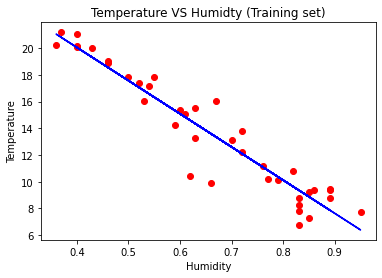

In [243]:
#Code for visualising traningdata and trained model
viz_train = plt
viz_train.scatter(x_train, y_train, color='red')
viz_train.plot(y_train, y_pred_train, color='blue')
viz_train.title('Temperature VS Humidty (Training set)')
viz_train.xlabel('Humidity')
viz_train.ylabel('Temperature')
viz_train.show()

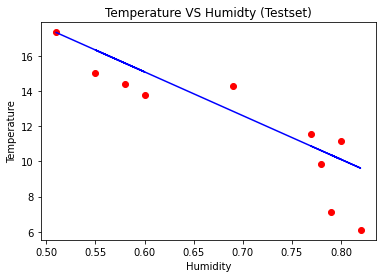

In [261]:
#Code for visualising testdata and trained model
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_test, y_pred_test, color='blue')
viz_test.title('Temperature VS Humidty (Testset)')
viz_test.xlabel('Humidity')
viz_test.ylabel('Temperature')
viz_test.show()

**Q** What do the two above visualisation show? 
>**Answer:** 
The first visualization show us how the result correlates with the trainingset and, as expected, the model has produced a linear correlation. 

>The second visualization show us how the result correlate with the test set and here we can see that there aren't that many data points in the testset, but the overall correlation is fairly linear. 

>We can see that temperature and humidity has a relationship in form of a negative correlation.

**Q** Why do we still predic using the training data and not the test data when visualising the result on the testset?
>**Answer:** Testing data shouln't be used for training the model. One should separate the test and training data because otherwise there's a risk of overfitting the data. The model can otherwise identify and use apparent relationships in the training data that do not hold in general. When visualising the result it's interesting for us to see how the result compares between the training data and testing data, and therefore we separate the two. 

**Q** What is the preformance measures of your model? Calculate MSE, R^2 and MRSE on both test and trainingdata using skikit_learn and interpret the result.

> **Answer:**
>MSE Train: 1.9014198305619776
>MRSE Train: 1.3789198057037173
>R^2 Score Train: 0.9058382414082742

>MSE Test: 3.1518136609712557
>MRSE Test: 1.7753348025009974
>R^2 Score Test: 0.7263393411483716

>Interpret: Our trainingdata seems to be quite good, the r^2 score is 0,9. Testdata is lower at 0,72.  

See scikit_learn library: [MSE/MRSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), #Evaluate on trainingset[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)

In [245]:
#Evaluate training

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("MSE train " + str(mean_squared_error(y_train, y_pred_train)))
print("MRSE train " + str(sqrt(mean_squared_error(y_train, y_pred_train))))
print("R^2 score train "  + str(r2_score(y_train, y_pred_train)))

MSE train 1.9014198305619776
MRSE train 1.3789198057037173
R^2 score train 0.9058382414082742


In [246]:
#Evaluate test

print("MSE test " + str(mean_squared_error(y_test, y_pred_test)))
print("MRSE test " + str(sqrt(mean_squared_error(y_test, y_pred_test))))
print("R^2 score test "  + str(r2_score(y_test, y_pred_test)))

MSE test 3.1518136609712557
MRSE test 1.7753348025009974
R^2 score test 0.7263393411483716


There is something strange about our r2_score, it is higher on the testset compared to the trainingset. This is against what we have learned, that models always perform better on trainingset compared to testset.

**Q** Why might that be? 

>**Answer:** In our case it isn't. But if it would, perhaps it would have to do with the amount of data that is in the sets. It's a very small amount of data. The testset could happen to match and give a false indication to be more accurate.

**Q** What can we do to make it better?
>**Answer:**
Increase the size of the training- and testsets.
A way to change the result of the measurements of the training- and testdata, is to either underfit or overfit the data. This is done by changing the variance and biaz. Random cross validation is a method that can be used to improve both training and validation. 

In order to see how or model performs we can also build a distribution plot of the actual values and the predicted values, this is done in the code below. 

**Q** Interpret the curves, what does it tell about the performance of the model?

**Answer:** It predicts too high at 5-10 values and a bit low at around 15 values.
The curves tell us that the models predicted values are slightly different from the actual values. However, the same pattern is emerging and we would therefore say the the model did a good job. Some variation in the result can easily occur since the data used isn't especially large. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


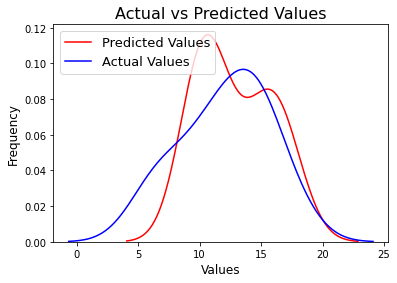

In [247]:
sns.distplot(y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## Multiple linear regression

### Your next task in regards to modeling is to perform a multiple linear regression in order to predic the same y.

**Q** What varaibles from your dataset are appropriate to add to x to have more variables as input? Why?

**Answer:** Two potential variables that can be used are: Wind speed, as well as Visibility. Wind speed is the best candidate of the two, since it has a higher correlation with the temperature (0.72). We will therefore choose this as our x value.

**C** Perform a multiple linear regression in a similar fashion as you did while performing the simple linear regression, start by assigning appropriate columns to X and y (y should be the same as in the simple linear regression).

*It is preferable to use other names for your variables so as not to create confusion or overwrite variables by misstake.*

**C** Evaluate your model using the same measurements as for the simple linear regression.

**C** Create a visualization that show the difference between real values and predicted values on testdata (see simple linear regression visualization).

**Q** Why is it difficult to create a visualization that show the result on training and testdata, similar to the ones we did in the simple linear regression above?

**Answer:** Since MLR contains several dimensions the visualization becomes more difficult. One way to work around this is to create m amount of diagrams that shows the simple linear regression for each dependent variable (x) in relation to y. 

**Q** How do the models differ? Which one is better than the other? Why?

**Answer:**
There's not a significant increase in accuracy but the model with two input variables has a slightly higher accuracy. We think that this would be more significant if the data set was larger. Therefore the second model might be the better alternative. However, if the accuracy still isn't increased notably, one can consider using the first instead for better performance (since there's only one input variable in the first model and readability (since it's alot easier to visualize and interpret the relationship).

*To answer the questions and do the required coding, please use one codeblock per question to facilitate the checking of your assignment.*

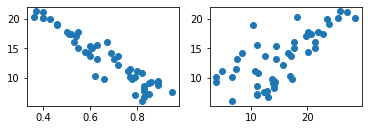

In [248]:
#Assign variables to X and y 
weather_features = ['Humidity', 'Wind_speed']

# Set X_ml to be the input columns with highest correlation according to our heatmap: Humidity, Wind_Speed and Visibility
X_ml = weather_data[weather_features]
y_ml = weather_data.Temperature

# Scatter visualisation of temp with Humidity, Wind_speed and Visibility. 
plt.subplot(2,2,1)
plt.scatter(X_ml['Humidity'],y_ml)
plt.subplot(2,2,2)
plt.scatter(X_ml['Wind_speed'],y_ml)

In [249]:
#Split the dataset in train and test

X_ml_train, X_ml_test, y_ml_train, y_ml_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)
print("Our training data has {} rows".format(len(X_ml_train)))
print("Our test data has {} rows".format(len(X_ml_test)))


Our training data has 39 rows
Our test data has 10 rows


In [250]:
#Train using trainingset and predict using testset
lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(X_ml_train, y_ml_train)

#Predict using testset
y_ml_pred_train =lm_model.predict(X_ml_train)
y_ml_pred_test = lm_model.predict(X_ml_test)

theta_0 = lm_model.intercept_
theta_1 = lm_model.coef_
theta_0, theta_1

(29.461392770811084, array([-2.44138731e+01,  1.56806614e-02]))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


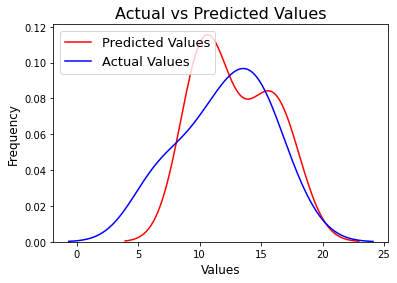

In [251]:
#Visualize the difference between real values and predicted values on testdata

sns.distplot(y_ml_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_ml_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

Text(0.5, 0, 'Temperature')

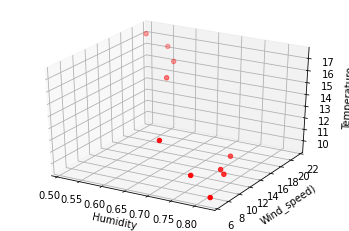

In [252]:
# PREDICTED VALUES ON TESTDATA

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = X_ml_test["Humidity"]
x2 = X_ml_test["Wind_speed"]

ax.scatter(x1, x2, y_ml_pred_test, c='r', marker='o')

# Set axis labels
ax.set_xlabel('Humidity')
ax.set_ylabel('Wind_speed)')
ax.set_zlabel('Temperature')

Text(0.5, 0, 'Temperature')

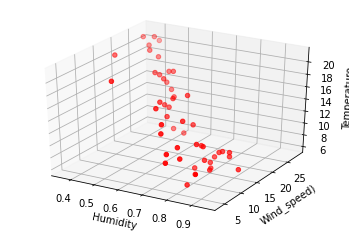

In [253]:
# PREDICTED VALUES ON TESTDATA

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = X_ml["Humidity"]
x2 = X_ml["Wind_speed"]

ax.scatter(x1, x2, y_ml, c='r', marker='o')

# Set axis labels
ax.set_xlabel('Humidity')
ax.set_ylabel('Wind_speed)')
ax.set_zlabel('Temperature')

In [259]:
# Evaluate training data
print("MSE train " + str(mean_squared_error(y_ml_train, y_ml_pred_train)))
print("MRSE train: " + str(sqrt(mean_squared_error(y_ml_train, y_ml_pred_train))))
print("R^2 Score train: " + str(r2_score(y_ml_train, y_ml_pred_train)))

# Evaluate testing data
print("MSE test " + str(mean_squared_error(y_ml_test, y_ml_pred_test)))
print("MRSE test " + str(sqrt(mean_squared_error(y_ml_test, y_ml_pred_test))))
print("R^2 Score test "  + str(r2_score(y_ml_test, y_ml_pred_test)))

MSE train 1.8972646639102102
MRSE train: 1.3774123071579585
R^2 Score train: 0.9060440127970455
MSE test 3.156119794043573
MRSE test 1.7765471550295457
R^2 Score test 0.7259654550813539
